<a href="https://colab.research.google.com/github/EndymionSleeping/1KB570-project/blob/main/QMOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mp-api

In [2]:
!pip uninstall ptitprince

In [3]:
from mp_api.client import MPRester

In [4]:
with MPRester("orZiiUOu9TZLk9hRpVBMmBBSY7YPRDzA") as mpr:
    docs = mpr.materials.summary.search(
        material_ids=["mp-149", "mp-13", "mp-22526"]
    )

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
print(docs)

[MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', run_id=None, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 46, 57, 168000), license='BY-C'),
nsites=2,
elements=[Element Si],
nelements=1,
composition=Composition('Si2'),
composition_reduced=Composition('Si1'),
formula_pretty='Si',
formula_anonymous='A',
chemsys='Si',
volume=40.32952684741405,
density=2.312800253345134,
density_atomic=20.164763423707026,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='2.0.2'),
property_name='summary',
material_id=MPID(mp-149),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 11, 22, 19, 46, 57, 169000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1947498), last_updated=datetime.datetime(2021, 3, 5, 11, 47, 3, 84000)), PropertyOrigin(name='energy', task_id=MPID(mp-1947498), last_updated=

In [7]:
!wget 'https://figshare.com/ndownloader/articles/13147324/versions/14'

--2024-10-09 16:56:19--  https://figshare.com/ndownloader/articles/13147324/versions/14
Resolving figshare.com (figshare.com)... 108.128.211.111, 63.34.223.101, 2a05:d018:1f4:d000:e2b4:1649:55da:37c5, ...
Connecting to figshare.com (figshare.com)|108.128.211.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407219972 (388M) [application/zip]
Saving to: ‘14.2’

14.2                100%[===================>] 388.35M  25.4MB/s    in 17s     

2024-10-09 16:56:36 (23.3 MB/s) - ‘14.2’ saved [407219972/407219972]



In [8]:
!unzip 14

Archive:  14
replace logo.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace logo.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: logo.jpg                
 extracting: qmof_database.zip       


In [ ]:
!unzip qmof_database.zip -d /qmof_db

Archive:  qmof_database.zip
replace /qmof_db/qmof_database/qmof.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /qmof_db/qmof_database/qmof.csv  
  inflating: /qmof_db/qmof_database/qmof.json  
  inflating: /qmof_db/qmof_database/qmof_structure_data.json  

  inflating: /qmof_db/qmof_database/README.md  

 extracting: /qmof_db/qmof_database/relaxed_structures.zip  
  inflating: /qmof_db/qmof_database/scripts/json_to_csv.py  
  inflating: /qmof_db/qmof_database/scripts/make_cifs.py  
 extracting: /qmof_db/qmof_database/unrelaxed_structures.zip  


In [10]:
import os
os.chdir('/qmof_db/qmof_database')

In [29]:
import pandas as pd

df = pd.read_csv('qmof.csv')
print(df.head())

        qmof_id          name       info.formula info.formula_reduced  \
0  qmof-8a95c27  ABACUF01_FSR      Ba2CuC6H14O16        Ba2CuC6H14O16   
1  qmof-019ba28    ABALOF_FSR  Cu12C36H56I16N4S4         Cu3C9H14I4NS   
2  qmof-830ed1c    ABAVIJ_FSR     Co4C48H32N8O16          CoC12H8N2O4   
3  qmof-5bd4a24    ABAVOP_FSR     Co4C48H32N8O16          CoC12H8N2O4   
4  qmof-644aab4    ABAXUZ_FSR    Zn2C50H32N6O8S4       ZnC25H16N3O4S2   

                           info.mofid.mofid                info.mofid.mofkey  \
0                                       NaN                              NaN   
1                                       NaN                              NaN   
2  [Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0  Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl   
3  [Co].[O-]C(=O)c1ccncc1 MOFid-v1.rtl.cat0  Co.TWBYWOBDOCUKOW.MOFkey-v1.rtl   
4                                       NaN                              NaN   

  info.mofid.smiles_nodes                          info.mofid.smiles_linkers  \


<ipython-input-29-49a1b08d708d>:3: DtypeWarning: Columns (40,41,43,44,45,46,47,49,50,51,52,53,55,56,57,65,66,67,68,69,77,78,79,80,81,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('qmof.csv')


In [30]:
header_lst = list(df.columns.values)
for hed in header_lst:
  print(hed)

qmof_id
name
info.formula
info.formula_reduced
info.mofid.mofid
info.mofid.mofkey
info.mofid.smiles_nodes
info.mofid.smiles_linkers
info.mofid.smiles
info.mofid.topology
info.natoms
info.pld
info.lcd
info.density
info.volume
info.symmetry.spacegroup
info.symmetry.spacegroup_number
info.symmetry.spacegroup_crystal
info.symmetry.pointgroup
info.synthesized
info.source
info.doi
inputs.pbe.theory
inputs.pbe.pseudopotentials
inputs.pbe.encut
inputs.pbe.kpoints
inputs.pbe.gamma
inputs.pbe.spin
outputs.pbe.energy_total
outputs.pbe.energy_vdw
outputs.pbe.energy_elec
outputs.pbe.net_magmom
outputs.pbe.bandgap
outputs.pbe.cbm
outputs.pbe.vbm
outputs.pbe.directgap
outputs.pbe.bandgap_spins
outputs.pbe.cbm_spins
outputs.pbe.vbm_spins
outputs.pbe.directgap_spins
inputs.hle17.theory
inputs.hle17.pseudopotentials
inputs.hle17.encut
inputs.hle17.kpoints
inputs.hle17.gamma
inputs.hle17.spin
inputs.hse06_10hf.theory
inputs.hse06_10hf.pseudopotentials
inputs.hse06_10hf.encut
inputs.hse06_10hf.kpoints
inp

In [13]:
df_sorted_by_pld = df.dropna(subset=["info.pld"])
df_sorted_by_pld = df_sorted_by_pld.sort_values(by=['info.pld'], ascending=True)
df_sorted_by_pld.head()

,qmof_id,name,info.formula,info.formula_reduced,info.mofid.mofid,info.mofid.mofkey,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.mofid.topology,...,outputs.hse06.energy_elec,outputs.hse06.net_magmom,outputs.hse06.bandgap,outputs.hse06.cbm,outputs.hse06.vbm,outputs.hse06.directgap,outputs.hse06.bandgap_spins,outputs.hse06.cbm_spins,outputs.hse06.vbm_spins,outputs.hse06.directgap_spins
7844,qmof-82d5634,LEPKIB_FSR,K4C6H2N6O6,K2C3HN3O3,NaN,NaN,['[K]'],['O=C1NC(=O)N=[C](=O)[N]1'],O=C1NC(=O)N=[C](=O)[N]1.[K],"ERROR,UNKNOWN",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7328,qmof-d3a3906,KIYBEZ01_FSR,K9C18H12N9O33,K3C6H4N3O11,NaN,NaN,['[K][OH2][K][OH2][K]'],['O=N(=O)[C]1C(=O)[C](N(=O)=O)C(=O)[C](C1=O)N(...,O=N(=O)[C]1C(=O)[C](N(=O)=O)C(=O)[C](C1=O)N(=O...,NaN,...,-631.074067,0.0,3.173919,2.352000,-0.821919,True,"[None, None]","[None, None]","[None, None]","[None, None]"
10412,qmof-ac2a33a,ORONOA_FSR,K12C24H20O28,K3C6H5O7,NaN,NaN,['[K]'],['[O-]C(=O)C(CC(=O)[O-])(CC(=O)[O-])O'],[K].[O-]C(=O)C(CC(=O)[O-])(CC(=O)[O-])O,NaN,...,-631.596840,0.0,6.438480,4.695300,-1.743180,True,"[None, None]","[None, None]","[None, None]","[None, None]"
11833,qmof-53f9751,QQQFIP02_FSR,K4C12Cl4H4O10,K2C6Cl2H2O5,NaN,NaN,['[K][OH2][K]'],['Cl[C]1C(=O)C(=O)[C](C(=O)C1=O)Cl'],Cl[C]1C(=O)C(=O)[C](C(=O)C1=O)Cl.[K][OH2][K],bex,...,-256.590938,0.0,2.338748,2.556406,0.217658,False,"[None, None]","[None, None]","[None, None]","[None, None]"
7347,qmof-da50262,KMTSUL01_FSR,K12C4H12O40S12,K3CH3O10S3,NaN,NaN,"['[K]', '[K][OH2][K]']",['[O]S(C(S([O])([O])[O])S([O])([O])[O])([O])[O]'],[K].[K][OH2][K].[O]S(C(S([O])([O])[O])S([O])([...,NaN,...,-562.641778,0.0,7.358938,5.819059,-1.539879,True,"[None, None]","[None, None]","[None, None]","[None, None]"


In [14]:

import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [49]:
bandgap = [
    'outputs.hse06.bandgap', 'outputs.pbe.bandgap','outputs.hle17.bandgap'
]
subset_df = df[bandgap]
# Collect only the specified columns

subset_df = subset_df.fillna(0)
new_column_names = {
    'outputs.hse06.bandgap': 'HSE06 ',
    'outputs.pbe.bandgap': 'PBE',
    'outputs.hle17.bandgap': 'HLE17'
}

# Rename columns in the subset DataFrame
subset_df = subset_df.rename(columns=new_column_names, inplace=False)
# Show the resulting subset of data
subset_df

,HSE06,PBE,HLE17
0,0.000000,0.632527,0.000000
1,0.000000,1.134232,0.000000
2,0.000000,0.345448,0.000000
3,0.000000,0.342645,0.000000
4,2.901747,1.973007,2.105312
...,...,...,...
20370,0.000000,2.692705,0.000000
20371,0.000000,3.326284,0.000000
20372,0.000000,3.383629,0.000000
20373,0.000000,0.660589,0.000000


Hur bandgapet ändras beroende på vilken DFT method som används
This visulize how the bandgap differ in terms of which DFT method used, it is clear that the shape of the band gap distribution can vary depending on the DFA method used. In the PBE, one can see two distinic peaks for QMOF Database of ~20,000 structures.


<ipython-input-26-1ed9a9ef6407>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Method", y="Bandgap", data=df_melted, inner=None, palette="Set1", width=0.6)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


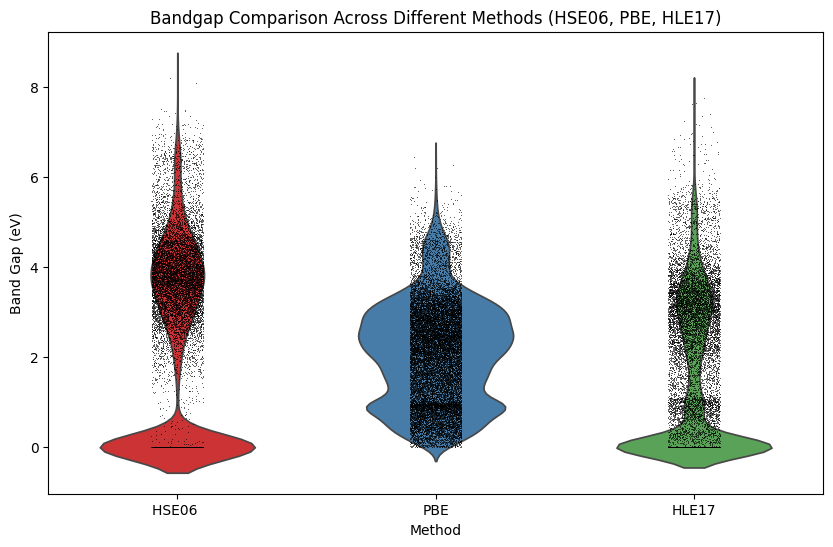

In [26]:
df = pd.DataFrame(subset_df)


# Melt the dataframe to long-form for Seaborn
df_melted = df.melt(var_name='Method', value_name='Bandgap')

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

sns.violinplot(x="Method", y="Bandgap", data=df_melted, inner=None, palette="Set1", width=0.6)

# Strip plot (individual points)
sns.stripplot(x="Method", y="Bandgap", data=df_melted, jitter=True, size=0.5, color='black', alpha=1)

# Box plot (summary statistics) with adjusted width and position
#sns.boxplot(x="Method", y="Bandgap", data=df_melted, whis=[0, 100], width=0.3, palette="Set2", fliersize=0)

# Add labels and title
plt.ylabel("Band Gap (eV)")
plt.xlabel("Method")
plt.title("Bandgap Comparison Across Different Methods (HSE06, PBE, HLE17)")

# Show plot
plt.show()

In [44]:
magmom = ['outputs.hle17.net_magmom', 'outputs.hse06_10hf.net_magmom', 'outputs.hse06.net_magmom']
subset_df = df[magmom]

subset_df = subset_df.fillna(0)

# Create a DataFrame where all values are zero
df_zeros = subset_df[(subset_df == 0).all(axis=1)]

# Create a DataFrame where at least one value is non-zero
df_non_zeros = subset_df[(subset_df != 0).any(axis=1)]
print("QMOFS with zero magnetic moment")
df_zeros

QMOFS with zero magnetic moment


,outputs.hle17.net_magmom,outputs.hse06_10hf.net_magmom,outputs.hse06.net_magmom
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
20370,0.0,0.0,0.0
20371,0.0,0.0,0.0
20372,0.0,0.0,0.0
20373,0.0,0.0,0.0


In [42]:
print("QMOFS with non-zero magnetci moment")
df_non_zeros

QMOFS with non-zero magnetci moment


,outputs.hle17.net_magmom,outputs.hse06_10hf.net_magmom,outputs.hse06.net_magmom
37,1.0,1.0,1.0
61,2.0,2.0,2.0
91,2.0,2.0,2.0
130,6.0,6.0,6.0
147,2.0,2.0,2.0
...,...,...,...
15912,1.0,1.0,1.0
15922,1.0,1.0,1.0
15932,2.0,2.0,2.0
15942,1.0,1.0,1.0


In [73]:
energytot = [
    'outputs.pbe.energy_total','outputs.hse06.energy_total', 'outputs.hle17.energy_total'
]
#finding the closed shell configurations
subset_df = df[energytot + magmom]
# Collect only the specified columns
df_zeros = subset_df[(subset_df == 0).all(axis=1)]
subset_df = subset_df.fillna(0)
new_column_names = {
    'outputs.pbe.energy_total': 'PBE ',
    'outputs.hse06.energy_total': 'HSE06',
    'outputs.hle17.energy_total': 'HLE17'
}
sorted_closed_shell_df = df_zeros.sort_values(by=magmom, ascending=False)

# Rename columns in the subset DataFrame
subset_df = subset_df.rename(columns=new_column_names, inplace=False)
# Show the resulting subset of data
subset_df

,PBE,HSE06,HLE17,outputs.hle17.net_magmom,outputs.hse06_10hf.net_magmom,outputs.hse06.net_magmom
0,-238.661416,0.000000,0.000000,0.0,0.0,0.0
1,-672.046744,0.000000,0.000000,0.0,0.0,0.0
2,-759.996078,0.000000,0.000000,0.0,0.0,0.0
3,-760.103362,0.000000,0.000000,0.0,0.0,0.0
4,-700.817715,-819.609388,-4801.212415,0.0,0.0,0.0
...,...,...,...,...,...,...
20370,-1214.792949,0.000000,0.000000,0.0,0.0,0.0
20371,-1456.386598,0.000000,0.000000,0.0,0.0,0.0
20372,-913.083401,0.000000,0.000000,0.0,0.0,0.0
20373,-1512.607322,0.000000,0.000000,0.0,0.0,0.0


In [82]:
energytot = [
    'outputs.pbe.energy_total','outputs.hse06.energy_total', 'outputs.hle17.energy_total'
]
magmom = ['outputs.hle17.net_magmom', 'outputs.hse06_10hf.net_magmom', 'outputs.hse06.net_magmom']
#finding the closed shell configurations
subset_df = df[energytot + magmom]
# Collect only the specified columns
subset_df = subset_df.fillna(0)
df_non_zeros = subset_df[(subset_df[magmom] != 0).any(axis=1)]

new_column_names = {
    'outputs.pbe.energy_total': 'PBE ',
    'outputs.hse06.energy_total': 'HSE06',
    'outputs.hle17.energy_total': 'HLE17'
}
sorted_open_shell_df = df_non_zeros.sort_values(by=energytot, ascending=False)

# Rename columns in the subset DataFrame
subset_df = sorted_open_shell_df.rename(columns=new_column_names, inplace=False)
# Show the resulting subset of data
subset_df

,PBE,HSE06,HLE17,outputs.hle17.net_magmom,outputs.hse06_10hf.net_magmom,outputs.hse06.net_magmom
2828,-110.172656,0.000000,-2069.768228,0.33,0.0,0.0
13910,-120.692405,-146.181971,-1191.721244,5.00,5.0,5.0
3223,-138.686393,-171.934419,0.000000,0.00,2.0,2.0
11769,-146.243082,-174.179822,-1151.163772,1.00,1.0,1.0
13268,-149.894586,-184.289096,-1098.953712,5.00,5.0,5.0
...,...,...,...,...,...,...
8424,-1024.159793,-1210.207001,-6386.957070,6.00,6.0,6.0
9947,-1026.864778,-1230.763982,-6808.177289,6.00,6.0,6.0
4356,-1048.271027,-1242.412684,-6631.515689,12.00,12.0,12.0
3240,-1054.250872,-1226.260740,-7335.350662,2.00,2.0,2.0


In [ ]:
columns_of_interest = [
    'info.natoms', 'info.volume', 'info.pld', 'info.lcd',
    'outputs.pbe.bandgap', 'outputs.hse06.energy_total', 'outputs.hse06.bandgap'
]
# Collect only the specified columns
subset_df = df[columns_of_interest]
subset_df = subset_df.fillna(0)
# Show the resulting subset of data
subset_df.head()

In [ ]:
scaler = StandardScaler().fit(subset_df)
_scaled = scaler.transform(subset_df)
_scaled=pd.DataFrame(_scaled,columns=subset_df.columns)
_scaled.head()

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(_scaled)

# create tabular form for data after scaled
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = ['info.natoms', 'info.volume', 'info.pld', 'info.lcd',
    'outputs.pbe.bandgap', 'outputs.hse06.energy_total', 'outputs.hse06.bandgap']

# print new data frame
df_X_scaled.head(5)

In [ ]:
pca = PCA()
pca.fit(X_scaled)

# Access the component matrix
component_matrix = pca.components_

# conver array to tabular
df_component_matrix = pd.DataFrame(component_matrix)

# Set the column names
df_component_matrix.columns = ['info.natoms', 'info.volume', 'info.pld', 'info.lcd',
    'outputs.pbe.bandgap','outputs.hse06.energy_total', 'outputs.hse06.bandgap']

# Define the desired index labels
index_labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5','PC 6','PC 7']

# Replace the index labels
df_matrix =df_component_matrix.set_axis(index_labels, axis=0)

# Transpose the DataFrame
transposed_data = df_matrix.transpose()  # or data.T

# Print the transposed DataFrame
transposed_data

In [ ]:
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create dataframes from the obtained values
eigenvalue_df = pd.DataFrame(eigenvalues)
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio)
cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance)

# Concatenate the dataframes into a single dataframe
eigenvalue_proportion = pd.concat([eigenvalue_df, explained_variance_ratio_df, cumulative_explained_variance_df], axis=1)
eigenvalue_proportion.columns = ['Total', '%Variance', 'Cumulative%']
eigenvalue_proportion

According to the scree plot only 3 PCA compontents is high enough to explain the variance and can therefore be used to describe the data, due to Kaiser rule of egienvalues being at least 1.

In [ ]:
# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
transposed_data = transposed_data.drop(columns=transposed_data.columns[3:7])


# sum square each observation from PC1 to PC5
transposed_data['sum_of_squares'] = transposed_data.apply(lambda x: sum(x ** 2), axis=1)

transposed_data

**Interpretation of each PCA loadings **
In PC1, it seems like volume (0.407), pore limiting diameter (0.388) and largest cavity diameter (0.413) andseems to be dominated by strutural properties.

PC2: Number of atoms (0.56) is positively correlated while total energy calculated with a function pbe in DFT seems to be negatively correlated (-0.548), which may indicate that the higher counts of atoms may correspond to more negative totalt energy.

PC3: Here, the pbe bandgap and hse06 bandgap seems to correlate with each other.




In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(columns_of_interest))], index=columns_of_interest)
print("PCA Loadings (contribution of each variable to the PCs):")
print(loadings)

In [ ]:

def biplot(transposed_data, loadings, features, pc1=0, pc2=1):
    plt.figure(figsize=(10, 10))

    # Plot the principal components (PC1 v-s PC2)
    plt.scatter(transposed_data.iloc[:, pc1], transposed_data.iloc[:, pc2], alpha=0.5)

    # Plot loadings (arrows showing variable contributions)
    for i, feature in enumerate(features):
        plt.arrow(0, 0, loadings.iloc[i, pc1], loadings.iloc[i, pc2], color='r', alpha=0.7)
        plt.text(loadings.iloc[i, pc1] * 1.15, loadings.iloc[i, pc2] * 1.15, feature, color='g', ha='center', va='center')

    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
    plt.grid()

# Call the biplot function
biplot(transposed_data, loadings, features=columns_of_interest)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a pandas DataFrame (df)
# Perform correlation analysis between structural and electronic properties

correlation_data = df[['info.natoms', 'info.volume', 'info.pld', 'info.lcd',
    'outputs.pbe.bandgap', 'outputs.pbe.energy_total','outputs.hse06.energy_total', 'outputs.hse06.bandgap']]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix between Structural and Electronic Properties")
plt.show()